In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 没有加入正则化的情况

In [2]:
# 读入数据/标签 生成x_train y_train
df=pd.read_csv("dot.csv")

In [3]:
df.head()

,x1,x2,y_c
0,-0.416758,-0.056267,1
1,-2.136196,1.640271,0
2,-1.793436,-0.841747,0
3,0.502881,-1.245288,1
4,-1.057952,-0.909008,1


In [4]:
x_data=np.array(df[['x1','x2']])
y_data=np.array(df['y_c'])

In [5]:
x_data

array([[-4.16757847e-01, -5.62668270e-02],
       [-2.13619610e+00,  1.64027081e+00],
       [-1.79343559e+00, -8.41747366e-01],
       [ 5.02881417e-01, -1.24528809e+00],
       [-1.05795222e+00, -9.09007615e-01],
       [ 5.51454045e-01,  2.29220801e+00],
       [ 4.15393930e-02, -1.11792545e+00],
       [ 5.39058321e-01, -5.96159700e-01],
       [-1.91304970e-02,  1.17500122e+00],
       [-7.47870949e-01,  9.02525100e-03],
       [-8.78107893e-01, -1.56434170e-01],
       [ 2.56570452e-01, -9.88779049e-01],
       [-3.38821966e-01, -2.36184031e-01],
       [-6.37655012e-01, -1.18761229e+00],
       [-1.42121723e+00, -1.53495196e-01],
       [-2.69056960e-01,  2.23136679e+00],
       [-2.43476758e+00,  1.12726505e-01],
       [ 3.70444537e-01,  1.35963386e+00],
       [ 5.01857207e-01, -8.44213704e-01],
       [ 9.76000000e-06,  5.42352572e-01],
       [-3.13508197e-01,  7.71011738e-01],
       [-1.86809066e+00,  1.73118467e+00],
       [ 1.46767801e+00, -3.35677339e-01],
       [ 6.

In [6]:
y_data

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [7]:
# 设置训练集
x_train=np.vstack(x_data).reshape(-1,2)
y_train=np.vstack(y_data).reshape(-1,1)

In [8]:
Y_c=[['red' if y else 'blue'] for y in y_train] # 在训练集的结果中进行标记,如果y==1则标记为红色,反之为蓝色,便于之后画图

In [15]:
Y_c

[['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['blue'],
 ['red'],
 ['blue'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['blue'],
 ['blue'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['r

In [9]:
# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

In [10]:
# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

In [13]:
# 生成神经网络的参数，输入层为2个神经元，隐藏层为11个神经元，1层隐藏层，输出层为1个神经元
w1=tf.Variable(tf.random.normal([2,11],dtype=tf.float32))
b1=tf.Variable(tf.constant(0.01,shape=[11]))

w2=tf.Variable(tf.random.normal([11,1]),dtype=tf.float32)
b2=tf.Variable(tf.constant(0.01,shape=[1]))
lr = 0.005  # 学习率
epoch = 800  # 循环轮数

In [14]:
# 训练部分
for epoch in range(epoch):
    for step,(x_train,y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            h1=tf.matmul(x_train,w1)+b1
            h1=tf.nn.relu(h1)
            y=tf.matmul(h1,w2)+b2
             # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss=tf.reduce_mean(tf.square(y_train-y))
        # 计算loss对各个参数的梯度
        variables=[w1,b1,w2,b2]
        grads=tape.gradient(loss,variables)
        # 实现梯度更新
        # w1 = w1 - lr * w1_grad tape.gradient是自动求导结果与[w1, b1, w2, b2] 索引为0，1，2，3 
        w1.assign_sub(lr*grads[0])
        b1.assign_sub(lr*grads[1])
        w2.assign_sub(lr*grads[2])
        b2.assign_sub(lr*grads[3])
        # 每20个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))
# 进行预测
print("*******predict*********")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx,yy=np.mgrid[-3:3:0.01,-3:3:0.01]
# 将xx , yy拉直，并合并配对为二维张量，生成二维坐标点
grid=np.c_[xx.ravel(),yy.ravel()]
grid=tf.cast(grid,tf.float32)
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs=[]
for x_test in grid:
    # 使用训练好的参数进行预测
    h1=tf.matmul([x_test],w1)+b1
    h1=tf.nn.relu(h1)
    y=tf.matmul(h1,w2)+b2
    probs.append(y)

epoch: 0 loss: 2.521533966064453
epoch: 20 loss: 0.15538014471530914
epoch: 40 loss: 0.07382390648126602
epoch: 60 loss: 0.05487890914082527
epoch: 80 loss: 0.04793056845664978
epoch: 100 loss: 0.04455791786313057
epoch: 120 loss: 0.04216758534312248
epoch: 140 loss: 0.04075293615460396
epoch: 160 loss: 0.03953132405877113
epoch: 180 loss: 0.038349367678165436
epoch: 200 loss: 0.03757552430033684
epoch: 220 loss: 0.03663431853055954
epoch: 240 loss: 0.035867493599653244
epoch: 260 loss: 0.035039022564888
epoch: 280 loss: 0.034274131059646606
epoch: 300 loss: 0.03356590494513512
epoch: 320 loss: 0.032879769802093506
epoch: 340 loss: 0.0324016734957695
epoch: 360 loss: 0.031951162964105606
epoch: 380 loss: 0.03150901570916176
epoch: 400 loss: 0.03099517524242401
epoch: 420 loss: 0.02986619621515274
epoch: 440 loss: 0.028583111241459846
epoch: 460 loss: 0.027710221707820892
epoch: 480 loss: 0.027067506685853004
epoch: 500 loss: 0.026638559997081757
epoch: 520 loss: 0.026313379406929016
ep

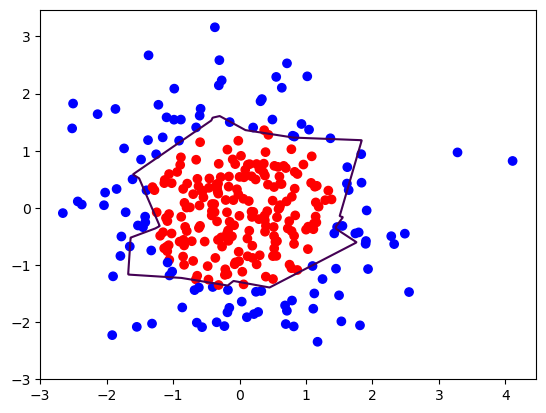

In [16]:
# 取第0列给x1，取第1列给x2
x1=x_data[:,0]
x2=x_data[:,1]
probs=np.array(probs).reshape(xx.shape)
plt.scatter(x1,x2,color=np.squeeze(Y_c)) # squeeze去掉纬度是1的纬度,相当于去掉[['red'],[''blue]],内层括号变为['red','blue']
# 把坐标xx yy和对应的值probs放入contour函数，给probs值为0.5的所有点上色  plt.show()后 显示的是红蓝点的分界线
plt.contour(xx,yy,probs,levels=[0.5])
plt.show()

#### 使用正则化减小过拟合之后

epoch: 0 loss: 2.3012900352478027
epoch: 20 loss: 0.5927810072898865
epoch: 40 loss: 0.5333924293518066
epoch: 60 loss: 0.497691810131073
epoch: 80 loss: 0.4690479636192322
epoch: 100 loss: 0.43994957208633423
epoch: 120 loss: 0.41052931547164917
epoch: 140 loss: 0.38298970460891724
epoch: 160 loss: 0.35969996452331543
epoch: 180 loss: 0.33954423666000366
epoch: 200 loss: 0.32146158814430237
epoch: 220 loss: 0.304932564496994
epoch: 240 loss: 0.28973135352134705
epoch: 260 loss: 0.27543914318084717
epoch: 280 loss: 0.2620623707771301
epoch: 300 loss: 0.24957041442394257
epoch: 320 loss: 0.23789972066879272
epoch: 340 loss: 0.22702084481716156
epoch: 360 loss: 0.2168245166540146
epoch: 380 loss: 0.20730160176753998
epoch: 400 loss: 0.1983775645494461
epoch: 420 loss: 0.18966777622699738
epoch: 440 loss: 0.1815134733915329
epoch: 460 loss: 0.17391130328178406
epoch: 480 loss: 0.16677725315093994
epoch: 500 loss: 0.1601673662662506
epoch: 520 loss: 0.15394502878189087
epoch: 540 loss: 0.1

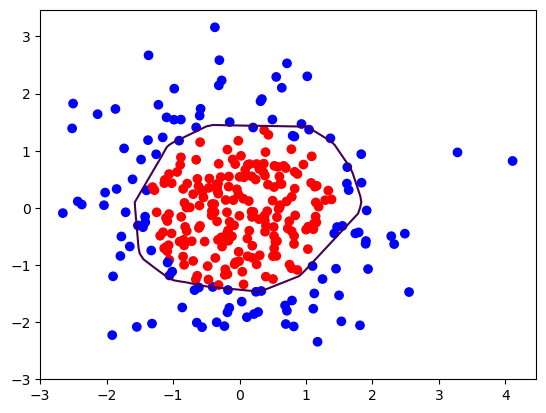

In [17]:
# 读入数据/标签 生成x_train y_train
df = pd.read_csv('dot.csv')
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df['y_c'])
 
x_train = x_data
y_train = y_data.reshape(-1, 1)
 
Y_c = [['red' if y else 'blue'] for y in y_train]
 
# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)
 
# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
 
# 生成神经网络的参数，输入层为4个神经元，隐藏层为32个神经元，2层隐藏层，输出层为3个神经元
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))
 
w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))
 
lr = 0.005  # 学习率为
epoch = 800  # 循环轮数
 
# 训练部分
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:  # 记录梯度信息
 
            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1, w2) + b2
 
            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_mse = tf.reduce_mean(tf.square(y_train - y))
            # 添加l2正则化
            loss_regularization = []
            # tf.nn.l2_loss(w)=sum(w ** 2) / 2
            loss_regularization.append(tf.nn.l2_loss(w1))
            loss_regularization.append(tf.nn.l2_loss(w2))
            # 求和
            # 例：x=tf.constant(([1,1,1],[1,1,1]))
            #   tf.reduce_sum(x)
            # >>>6
            loss_regularization = tf.reduce_sum(loss_regularization)
            loss = loss_mse + 0.03 * loss_regularization  # REGULARIZER = 0.03
 
        # 计算loss对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)
 
        # 实现梯度更新
        # w1 = w1 - lr * w1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
 
    # 每200个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))
 # 预测部分
print("*******predict*******")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx, yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs = []
for x_predict in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_predict], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)
# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子
probs = np.array(probs).reshape(xx.shape)
plt.scatter(x1, x2, color=np.squeeze(Y_c))
# 把坐标xx yy和对应的值probs放入contour函数，给probs值为0.5的所有点上色  plt.show()后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()
 